In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston
import xgboost as xgb
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
directory = os.path.join('sample_data', 'california_housing_train.csv') # Output: sample_data/california_housing_train.csv

if os.path.isfile(directory):
  print("File ditemukan")

File ditemukan


In [4]:
dataset = pd.read_csv(directory)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf26551198>,
      dtype=object)

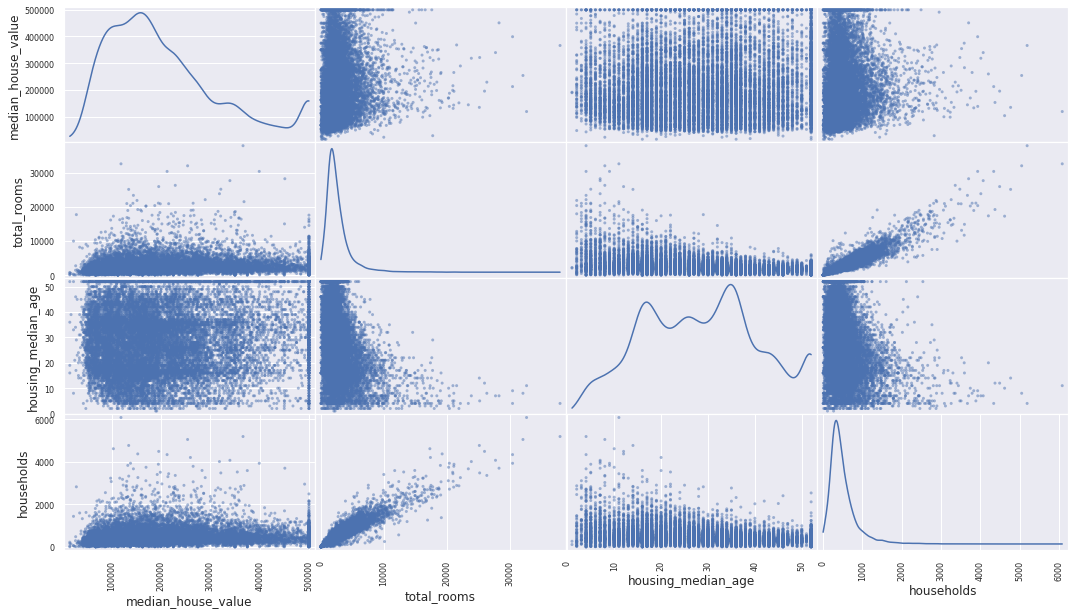

In [ ]:
#1
sb.set()
features = ['median_house_value','total_rooms','housing_median_age','households',]
pd.plotting.scatter_matrix(dataset[features], figsize=(18, 10), diagonal='kde')

In [5]:
# scaler = preprocessing.StandardScaler()
scaler = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)

In [6]:
features_used = dataset.drop(['median_house_value'], axis =1)

# features_used

label = dataset['median_house_value']

features_scaled = scaler.fit_transform(features_used.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1, 1)).flatten()


In [ ]:
def forest_regresi_test(value_test):
  feature_train, feature_test,label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=value_test) # value_test % an training & testing

  # linear_reg = linear_model.LinearRegression()
  # linear_reg.fit(feature_train,label_train)
  # r2_score(linear_reg.predict(feature_train), label_train)

  # cross_validation_score = cross_val_score(linear_reg, feature_train,label_train, cv=10)
  # reg_score = r2_score(linear_reg.predict(feature_test),label_test) 

  # print(cross_validation_score)
  # print(reg_score)

  forest_reg = RandomForestRegressor()

  forest_reg.fit(feature_train,label_train)
  r2_score(forest_reg.predict(feature_train), label_train)
  # cross_validation_score = cross_val_score(forest_reg, feature_train, label_train, cv=10)

  # print(cross_validation_score)

  forest_score = r2_score(forest_reg.predict(feature_test), label_test) 
  print(forest_score)

  predictions = forest_reg.predict(feature_test)
  plt.scatter(label_test, predictions)

0.7880819688824797


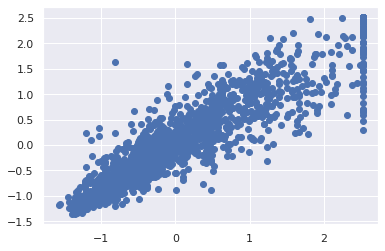

In [ ]:
forest_regresi_test(0.1)

0.7848661517116422


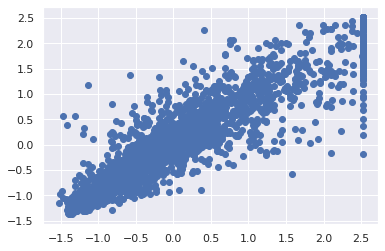

In [ ]:
forest_regresi_test(0.15)

0.7772241171910689


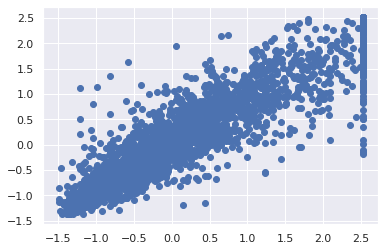

In [ ]:
forest_regresi_test(0.2)

In [9]:
feature_train, feature_test,label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.2)


In [ ]:
#KMeans
feature_train, feature_test,label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.2)
X = feature_test
y = label_test

kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.0


In [ ]:
#beberapa Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
lr = LinearRegression()
lr.fit(feature_train, label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_train_lr= lr.predict(feature_train)
print(np.sqrt(mean_squared_error(label_train,pred_train_lr)))
print(r2_score(label_train, pred_train_lr))

pred_test_lr= lr.predict(feature_test)
print(np.sqrt(mean_squared_error(label_test,pred_test_lr))) 
print(r2_score(label_test, pred_test_lr))

0.5981862465285241
0.6388493044951562
0.6021378285254697
0.6502994140663796


In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(feature_train, label_train) 
pred_train_rr= rr.predict(feature_train)
print(np.sqrt(mean_squared_error(label_train,pred_train_rr)))
print(r2_score(label_train, pred_train_rr))

pred_test_rr= rr.predict(feature_test)
print(np.sqrt(mean_squared_error(label_test,pred_test_rr))) 
print(r2_score(label_test, pred_test_rr))

0.5981862465412283
0.638849304479816
0.6021377068763129
0.6502995553655144


In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(feature_train, label_train) 
pred_train_lasso= model_lasso.predict(feature_train)
print(np.sqrt(mean_squared_error(label_train,pred_train_lasso)))
print(r2_score(label_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(feature_test)
print(np.sqrt(mean_squared_error(label_test,pred_test_lasso))) 
print(r2_score(label_test, pred_test_lasso))

0.604037816516813
0.6317490579590292
0.6087395993291541
0.6425892226157599


In [ ]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(feature_train, label_train) 
pred_train_enet= model_enet.predict(feature_train)
print(np.sqrt(mean_squared_error(label_train,pred_train_enet)))
print(r2_score(label_train, pred_train_enet))

pred_test_enet= model_enet.predict(feature_test)
print(np.sqrt(mean_squared_error(label_test,pred_test_enet)))
print(r2_score(label_test, pred_test_enet))

0.6011686900079646
0.6352390687855759
0.6050856494759438
0.6468670502900518


In [ ]:
#Bayes (masih error)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()


In [ ]:
gnb.fit(feature_train,label_train)
y2_GNB_model = gnb.predict(feature_test)
print("GaussianNB Accuracy :", accuracy_score(label_test, y2_GNB_model))

In [ ]:
BNB.fit(feature_train,label_train)
y2_BNB_model = BNB.predict(feature_test)
print("BNB Accuracy :", accuracy_score(label_test, y2_BNB_model))

In [16]:
#XGBOOST

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 2000)

In [17]:
xg_reg.fit(feature_train,label_train)

preds = xg_reg.predict(feature_test)

[02:14:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
xgb_score = r2_score(xg_reg.predict(feature_test), label_test)
rmse = np.sqrt(mean_squared_error(label_test, preds))
print("RMSE: %f" % (rmse))
print(xgb_score)

RMSE: 0.431073
0.7709528730561518


In [ ]:
cross_validation_score = cross_val_score(xg_reg, feature_train,label_train, cv=10)
cross_validation_score

nilai prediksi yang didapatkan menggunakan xgboost yaitu 0.835054, dimana nilai ini lebih besar dari beberapa metode / algoritma sebelum nya, sehingga bisa saya simpulkan bahwa algoritma menggunakan xgboost lebih akurat dalam kasus ini.
 